In [152]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import networkx as nx
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\sjlap\Downloads\New folder\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean', 'std', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [153]:
from Scweet.scweet import scrape
from Scweet.user import get_user_information, get_users_following, get_users_followers

In [154]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train #if choice = 1, Person A is influencer, else

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,1529.643058,282.858500,76.809514,5.392171,104.438625,3307,...,1370,15143,6881.482996,5013.642295,22.683131,2.385538,18.420981,23958,21.324988,1413.825398
5496,1,112,243,5,1.445174,0.100503,0.100503,0.100503,0.603177,5,...,479,8,0.306073,0.306073,0.100503,0.100503,1.621981,1,49.000000,4969.000000
5497,0,15385,673,747,55.993546,22.321945,6.946233,0.341936,6.503977,202,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5498,0,265258,209,551,631.915946,457.648550,5.460985,0.100503,7.498126,2603,...,37601,22232,176.533716,42.330221,6.849227,1.345073,4.359865,696,234.338068,7168.464489


In [155]:
train = train.drop(['A_mentions_received','A_network_feature_1','B_mentions_received','B_network_feature_1', 'A_listed_count', 'B_listed_count'], axis = 1)
test = test.drop(['A_mentions_received','A_network_feature_1','B_mentions_received','B_network_feature_1', 'A_listed_count', 'B_listed_count'], axis = 1)

In [156]:
train.iloc[:,1:9]


,A_follower_count,A_following_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3
0,228,302,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000
1,21591,1179,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048
2,7310,1215,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907
3,20,7,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667
4,45589,862,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943
...,...,...,...,...,...,...,...,...
5495,41765,185,282.858500,76.809514,5.392171,104.438625,50.132042,3585.789866
5496,112,243,0.100503,0.100503,0.100503,0.603177,96.600000,1414.200000
5497,15385,673,22.321945,6.946233,0.341936,6.503977,152.495098,3286.617647
5498,265258,209,457.648550,5.460985,0.100503,7.498126,3.826314,506.692136


In [157]:
train.iloc[:,9:19]

,B_follower_count,B_following_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,34463,29808,3.984029,8.204331,0.332423,6.988815,75.530303,1916.893939
1,39262,848,8.943607,3.227677,0.564343,1.070321,132.030675,2931.515337
2,3622,482,0.354379,0.603202,0.100503,0.603202,10.333333,277.333333
3,19562,17637,390.293681,27.552040,7.167557,32.101906,23.469296,1395.845634
4,7554,1711,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
...,...,...,...,...,...,...,...,...
5495,804394,1370,5013.642295,22.683131,2.385538,18.420981,21.324988,1413.825398
5496,794,479,0.306073,0.100503,0.100503,1.621981,49.000000,4969.000000
5497,7554,1711,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
5498,322682,37601,42.330221,6.849227,1.345073,4.359865,234.338068,7168.464489


# Trying A-B

In [158]:
#converting data into a-b form we can use
x = train.iloc[:,1:9].values - train.iloc[:,9:]
xt = test.iloc[:,:8].values - test.iloc[:,8:]
x.columns = ['A/B_follower_count','A/B_following_count','A/B_retweets_received','A/B_mentions_sent',
              'A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
xt.columns = ['A/B_follower_count','A/B_following_count','A/B_retweets_received','A/B_mentions_sent',
              'A/B_retweets_sent','A/B_posts','A/B_network_feature_2','A/B_network_feature_3']
Y = train['Choice']
xt.head()

,A/B_follower_count,A/B_following_count,A/B_retweets_received,A/B_mentions_sent,A/B_retweets_sent,A/B_posts,A/B_network_feature_2,A/B_network_feature_3
0,-789634.0,-163.0,-511.618658,4.892394,-0.446147,-2.147318,-18.450098,-635.681188
1,-17134.0,-2226.0,86.073751,-11.308471,-0.529926,-8.638908,-198.525555,-20530.371522
2,-485112.0,3021.0,-598.318897,1.752067,0.004952,-3.242591,1.556849,-148.899966
3,-12843.0,-2340.0,-3.471618,4.625586,2.222561,5.873828,-108.840909,-2262.772727
4,-129031.0,-147190.0,9540.678116,-8.373042,0.480452,-176.790916,-7.871697,-438.391857


In [159]:
#scaling data
xt_value = xt.values
min_max_scaler = preprocessing.MinMaxScaler()
xt_scaled = min_max_scaler.fit_transform(xt_value)
xt = pd.DataFrame(xt_scaled, columns=xt.columns)
xt

,A/B_follower_count,A/B_following_count,A/B_retweets_received,A/B_mentions_sent,A/B_retweets_sent,A/B_posts,A/B_network_feature_2,A/B_network_feature_3
0,0.481390,0.546605,0.499408,0.518055,0.494058,0.494436,0.876160,0.642022
1,0.492500,0.544907,0.500094,0.432435,0.492486,0.477616,0.855642,0.614074
2,0.485770,0.549225,0.499309,0.501459,0.502523,0.491598,0.878440,0.642706
3,0.492562,0.544813,0.499991,0.516645,0.544140,0.515219,0.865861,0.639736
4,0.490891,0.425601,0.510946,0.447948,0.511447,0.041926,0.877365,0.642299
...,...,...,...,...,...,...,...,...
5947,0.454092,0.093805,0.499837,0.323341,0.497994,0.399677,0.874849,0.641664
5948,0.492389,0.544390,0.499997,0.504026,0.502431,0.503876,0.893847,0.649034
5949,0.503380,0.547394,0.500007,0.489369,0.487946,0.496045,0.866907,0.640598
5950,0.493486,0.544990,0.500218,0.434167,0.437374,0.510476,0.872412,0.641066


In [160]:
x_value = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_value)
x = pd.DataFrame(x_scaled, columns=x.columns)
x

,A/B_follower_count,A/B_following_count,A/B_retweets_received,A/B_mentions_sent,A/B_retweets_sent,A/B_posts,A/B_network_feature_2,A/B_network_feature_3
0,0.507400,0.347553,0.500128,0.447178,0.496772,0.482830,0.659024,0.386341
1,0.507632,0.363888,0.500151,0.516176,0.521014,0.510640,0.588358,0.335476
2,0.507932,0.364108,0.500143,0.531015,0.519267,0.507738,0.647840,0.369221
3,0.507606,0.354055,0.499684,0.329091,0.283996,0.424157,0.620181,0.336865
4,0.508414,0.363242,0.500170,0.637644,0.572905,0.550002,0.654856,0.346725
...,...,...,...,...,...,...,...,...
5495,0.497178,0.363058,0.494701,0.852803,0.597587,0.722876,0.637549,0.352861
5496,0.507871,0.363577,0.500132,0.500000,0.503991,0.497360,0.644042,0.326474
5497,0.507990,0.363138,0.500153,0.501184,0.479779,0.505029,0.663524,0.348811
5498,0.507074,0.343235,0.500609,0.490951,0.465248,0.508131,0.547966,0.312159


In [161]:
x.describe()

,A/B_follower_count,A/B_following_count,A/B_retweets_received,A/B_mentions_sent,A/B_retweets_sent,A/B_posts,A/B_network_feature_2,A/B_network_feature_3
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.507381,0.363663,0.500172,0.499428,0.504106,0.498924,0.627522,0.342863
std,0.038232,0.038562,0.016458,0.087979,0.084243,0.068338,0.050968,0.036884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.505301,0.362949,0.500060,0.471836,0.481296,0.485772,0.606997,0.332939
50%,0.507880,0.363715,0.500132,0.500000,0.503991,0.500000,0.627598,0.342504
75%,0.510378,0.364528,0.500206,0.527943,0.526932,0.513480,0.648849,0.352664
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
#splitting data into train and validation set
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0)

In [163]:
#run logistic regression for A-B
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
prediction_train = LogReg.predict(x_train)
print("Accuracy score for Logistic Regression on train set is", metrics.accuracy_score(y_train, prediction_train))
prediction_test = LogReg.predict(x_test)
print("Accuracy score for Logistic Regression on test set is", metrics.accuracy_score(y_test, prediction_test))


Accuracy score for Logistic Regression on train set is 0.6738636363636363
Accuracy score for Logistic Regression on test set is 0.6836363636363636


In [164]:
cf_matrix = confusion_matrix(y_test, prediction_test)
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

[[338 228]
 [120 414]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       566
           1       0.64      0.78      0.70       534

    accuracy                           0.68      1100
   macro avg       0.69      0.69      0.68      1100
weighted avg       0.69      0.68      0.68      1100



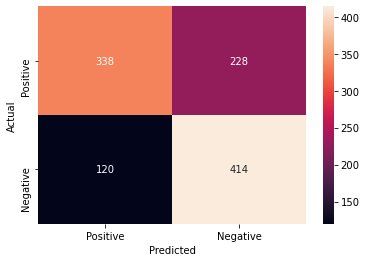

In [165]:
import seaborn as sns
ax = plt.subplot()

sns.heatmap(cf_matrix, annot = True, fmt = 'g', ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [191]:
#feature importance
var_coefficients = pd.Series(list(LogReg.coef_[0]), index = x.columns.values)
var_coefficients

A/B_follower_count       8.326544
A/B_following_count      2.051788
A/B_retweets_received    0.996354
A/B_mentions_sent        1.506799
A/B_retweets_sent        3.880981
A/B_posts                1.646768
A/B_network_feature_2    2.487737
A/B_network_feature_3    2.913136
dtype: float64

Text(0.5, 0, 'Relative Feature Importance')

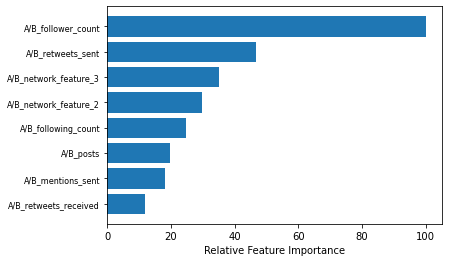

In [167]:
feature_importance = abs(LogReg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

#From the coeffecients we can see that in the 'A-B' model, the largest predictor of influence is the follower count. In this model, if the raw value of followers A has is greater than B, then there is an strong likelihood that A is an influencer over B. The opposite is true too, that if B is greater than A (thus A-B is negative, and when scaled, less than 0.5), B has a strong likelihood of being an influencer over A.

In [168]:
test.head()

,A_follower_count,A_following_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,614689,400,67.812469,9.366192,0.359534,4.094488,39.193741,2565.612519,1404323,563,579.431128,4.473798,0.805680,6.241806,57.643839,3201.293706
1,739581,10723,96.771319,1.537322,1.054358,3.467754,11.191686,966.193995,756715,12949,10.697567,12.845793,1.584284,12.106662,209.717241,21496.565517
2,3638,3341,1.402703,2.594089,0.598150,3.802143,9.416667,489.083333,488750,320,599.721600,0.842022,0.593199,7.044735,7.859818,637.983300
3,613,1259,0.356943,6.249678,2.323064,7.488116,5.000000,275.000000,13456,3599,3.828561,1.624092,0.100503,1.614287,113.840909,2537.772727
4,1352348,331,14552.733991,2.065418,0.580955,16.281502,3.092448,597.563636,1481379,147521,5012.055876,10.438460,0.100503,193.072418,10.964144,1035.955493


Targetting

In [172]:
Ytest = pd.read_csv('sample_predictions.csv')
test_contr = Ytest.iloc[:,[1]].copy(deep=True)
test_contr['A_follower_count'] = test.iloc[:,0]
test_contr['B_follower_count'] = test.iloc[:,9]

test_contr.head()

,Choice,A_follower_count,B_follower_count
0,0.315025,614689,563
1,0.474330,739581,12949
2,0.098802,3638,320
3,0.137932,613,3599
4,0.523677,1352348,147521


In [173]:
def get_contr_none(choice, A, B):
    if float(choice) >= .5: 
        contr = 10*.0001*float(A)
    else:
        contr = 10*.0001*float(B)
    return contr

test_contr['No Targeting'] = test_contr.apply(lambda row: get_contr_none(row['Choice'],row['A_follower_count'], row['B_follower_count']), axis = 1)
test_contr.head(5)


,Choice,A_follower_count,B_follower_count,No Targeting
0,0.315025,614689,563,0.563
1,0.474330,739581,12949,12.949
2,0.098802,3638,320,0.320
3,0.137932,613,3599,3.599
4,0.523677,1352348,147521,1352.348


In [174]:
def get_contr_perf(choice, A, B):
    if float(choice) >= .5: 
        contr = 10*.00015*float(A)
    else:
        contr = 10*.00015*float(B)
    return contr

test_contr['Perfect Targeting'] = test_contr.apply(lambda row: get_contr_perf(row['Choice'],row['A_follower_count'], row['B_follower_count']), axis = 1)
test_contr.head(5)

,Choice,A_follower_count,B_follower_count,No Targeting,Perfect Targeting
0,0.315025,614689,563,0.563,0.8445
1,0.474330,739581,12949,12.949,19.4235
2,0.098802,3638,320,0.320,0.4800
3,0.137932,613,3599,3.599,5.3985
4,0.523677,1352348,147521,1352.348,2028.5220


In [175]:
pred_all = list(LogReg.predict(xt))
def get_contr_model(choice, A, B, pred_all):
    curr_pred = pred_all.pop(0)
    if float(curr_pred) == 1 and float(choice) >= .5: 
        contr = 10*.00015*float(A) 
    elif float(curr_pred) == 0 and float(choice) < .5:
        contr = 10*.00015*float(B)
    else:
        contr = 0
    return contr

test_contr['Modeled Targeting'] = test_contr.apply(lambda row: get_contr_model(row['Choice'],row['A_follower_count'], row['B_follower_count'],pred_all), axis = 1)
test_contr.head()

,Choice,A_follower_count,B_follower_count,No Targeting,Perfect Targeting,Modeled Targeting
0,0.315025,614689,563,0.563,0.8445,0.000
1,0.474330,739581,12949,12.949,19.4235,0.000
2,0.098802,3638,320,0.320,0.4800,0.000
3,0.137932,613,3599,3.599,5.3985,0.000
4,0.523677,1352348,147521,1352.348,2028.5220,2028.522


In [176]:
pd.DataFrame(test_contr.iloc[:,-3:].sum(axis = 0) - len(test_contr)*10, columns = ['Twitter Makreting Contribution'])

,Twitter Makreting Contribution
No Targeting,3.576044e+06
Perfect Targeting,5.393827e+06
Modeled Targeting,5.308376e+06


In [177]:
pd.DataFrame(test_contr.iloc[:,-3:].sum(axis = 0) - len(test_contr)*10, columns = ['Twitter Makreting Contribution']).iloc[2]/pd.DataFrame(test_contr.iloc[:,-3:].sum(axis = 0) - len(test_contr)*10, columns = ['Twitter Makreting Contribution']).iloc[1]

Twitter Makreting Contribution    0.984158
dtype: float64

In the A-B model, our targetting performed extremely closely to the perfect model, which was able to predict at 98.4% of perfect targetting. The modeled targetting profits versus no targetting is vastly different. The modeled targetting leads to profits of nearly $2 million more than the no targetting model.

# A and B no subtraction/division

In [178]:
x2 = train.drop("Choice", axis = 1)
Y2 = train['Choice']
x2

,A_follower_count,A_following_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,228,302,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000,34463,29808,3.984029,8.204331,0.332423,6.988815,75.530303,1916.893939
1,21591,1179,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048,39262,848,8.943607,3.227677,0.564343,1.070321,132.030675,2931.515337
2,7310,1215,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907,3622,482,0.354379,0.603202,0.100503,0.603202,10.333333,277.333333
3,20,7,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667,19562,17637,390.293681,27.552040,7.167557,32.101906,23.469296,1395.845634
4,45589,862,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943,7554,1711,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,41765,185,282.858500,76.809514,5.392171,104.438625,50.132042,3585.789866,804394,1370,5013.642295,22.683131,2.385538,18.420981,21.324988,1413.825398
5496,112,243,0.100503,0.100503,0.100503,0.603177,96.600000,1414.200000,794,479,0.306073,0.100503,0.100503,1.621981,49.000000,4969.000000
5497,15385,673,22.321945,6.946233,0.341936,6.503977,152.495098,3286.617647,7554,1711,3.581661,6.764657,1.119727,4.563246,48.500000,1993.627907
5498,265258,209,457.648550,5.460985,0.100503,7.498126,3.826314,506.692136,322682,37601,42.330221,6.849227,1.345073,4.359865,234.338068,7168.464489


In [179]:
x2_values = x2.values
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(x2_values)
x2 = pd.DataFrame(x2_scaled, columns=x2.columns)
x2

,A_follower_count,A_following_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_2,B_network_feature_3
0,5.801356e-06,0.000259,0.000000e+00,0.000000,0.000000,0.001356,0.148528,0.078499,0.000943,0.044870,8.910729e-06,0.105644,0.014325,0.035696,0.040573,0.025381
1,5.903975e-04,0.001011,5.896344e-05,0.073118,0.062425,0.026305,0.016452,0.009197,0.001074,0.001276,2.029046e-05,0.040767,0.028650,0.005026,0.070924,0.038815
2,1.995995e-04,0.001042,2.169639e-05,0.068584,0.030309,0.018081,0.061488,0.041478,0.000099,0.000726,5.825161e-07,0.006553,0.000000,0.002605,0.005551,0.003672
3,1.094596e-07,0.000006,4.056719e-07,0.016048,0.000000,0.014148,0.001784,0.000665,0.000535,0.026549,8.952962e-04,0.357866,0.436506,0.165835,0.012607,0.018482
4,1.247100e-03,0.000739,8.466314e-05,0.362164,0.199690,0.123131,0.113652,0.019591,0.000206,0.002576,7.987499e-06,0.086876,0.062954,0.023126,0.026053,0.026397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1.142457e-03,0.000159,6.487868e-04,1.000000,0.326847,0.540691,0.044721,0.024789,0.022012,0.002062,1.150355e-02,0.294393,0.141138,0.094939,0.011455,0.018720
5496,2.627029e-06,0.000208,0.000000e+00,0.000000,0.000000,0.002605,0.086173,0.009777,0.000021,0.000721,4.716795e-07,0.000000,0.000000,0.007884,0.026322,0.065792
5497,4.205710e-04,0.000577,5.098698e-05,0.089243,0.014912,0.033183,0.136035,0.022721,0.000206,0.002576,7.987499e-06,0.086876,0.062954,0.023126,0.026053,0.026397
5498,7.258318e-03,0.000179,1.049842e-03,0.069881,0.000000,0.038335,0.003413,0.003503,0.008830,0.056600,9.689587e-05,0.087978,0.076873,0.022072,0.125881,0.094914


In [180]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, Y2, test_size = 0.2, random_state = 0)

In [181]:
#run logistic regression for A-B
LogReg2 = LogisticRegression()
LogReg2.fit(x_train2,y_train2)
prediction_train2 = LogReg2.predict(x_train2)
print("Accuracy score for Logistic Regression on train set is", metrics.accuracy_score(y_train2, prediction_train2))
prediction_test2 = LogReg2.predict(x_test2)
print("Accuracy score for Logistic Regression on test set is", metrics.accuracy_score(y_test2, prediction_test2))


Accuracy score for Logistic Regression on train set is 0.6788636363636363
Accuracy score for Logistic Regression on test set is 0.6836363636363636


In [182]:
print(confusion_matrix(y_test2, prediction_test2))
print(classification_report(y_test2, prediction_test2))

[[342 224]
 [124 410]]
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       566
           1       0.65      0.77      0.70       534

    accuracy                           0.68      1100
   macro avg       0.69      0.69      0.68      1100
weighted avg       0.69      0.68      0.68      1100



In [193]:
#feature importance
var_coefficients = pd.Series(list(LogReg2.coef_[0]), index = x2.columns.values)

Text(0.5, 0, 'Relative Feature Importance')

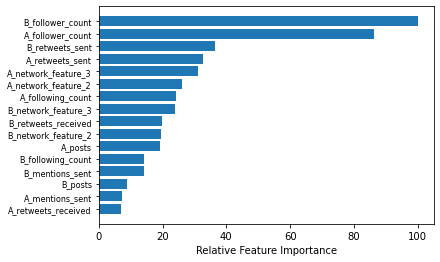

In [185]:
feature_importance = abs(LogReg2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train2.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In the base model with all of the data we find similar results to the A-B model, where the follower counts are the most important feature. 

##2: "\#Superbowl" Twitter Community Analysis
### Scraper

In [ ]:
superbowl_data = scrape(words=['superbowl','superbowl commercial'], since="2022-01-28", until="2022-02-10", from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en", resume=False, filter_replies=False, proximity=False,geocode="34.052235,-118.243683,200km")

In [ ]:
lv_sb = scrape(words=['superbowl'], since="2022-01-28", until="2022-02-10", from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en", resume=False, filter_replies=False, proximity=False,geocode="36.114647,-115.172813,100km")

In [ ]:
sd_sb = scrape(words=['superbowl'], since="2022-01-28", until="2022-02-10", from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en", resume=False, filter_replies=False, proximity=False,geocode="32.715736,-117.161087,50km")

In [ ]:
fresno_sb = scrape(words=['superbowl'], since="2022-01-28", until="2022-02-10", from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en", resume=False, filter_replies=False, proximity=False,geocode="36.746841,-119.772591,150km")

In [ ]:
sf_sb = scrape(words=['superbowl'], since="2022-02-03", until="2022-02-10", from_account = None, interval=1, headless=False, display_type="Top", save_images=False, lang="en", resume=False, filter_replies=False, proximity=False,geocode="37.773972,-122.431297,100km")

Cleaning scraped data into usable form.

In [ ]:
#sb = pd.concat(superbowl_data, lv_sb, sd_sb, fresno_sb, sf_sb)
#df.to_csv('supwerbowl_tweets.csv') 
sb = pd.read_csv('superbowl_tweets.csv')

In [ ]:
sb

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Alejandro Gomez,@Calilove_Gomez,2022-01-28T06:26:39.000Z,Alejandro Gomez\n@Calilove_Gomez\n·\nJan 28,My predictions for Super Bowl chiefs vs rams ...,NaN,NaN,1,1,[],https://twitter.com/Calilove_Gomez/status/1486...
1,1,Nurettin Çelik,@nrtbjk,2022-01-28T18:21:06.000Z,Nurettin Çelik\n@nrtbjk\n·\nJan 28,3 years ago!!! 1 week before the super bowl LI...,NaN,NaN,NaN,3,['https://pbs.twimg.com/media/FKNXmF8VcAAtHJl?...,https://twitter.com/nrtbjk/status/148712861782...
2,2,Jen Prince,@JenP,2022-01-28T16:41:59.000Z,Jen Prince\n@JenP\n·\nJan 28,A 1st look at the \n@RamsNFL\n & \n@SoFi\n hos...,NaN,12.0,14,177,['https://pbs.twimg.com/media/FKNA6WUVIAMz5pW?...,https://twitter.com/JenP/status/14871036754241...
3,3,d,@dannggggggggg,2022-01-28T12:37:14.000Z,d\n@dannggggggggg\n·\nJan 28,Now they wanna do it. Homeless Encampment Swe...,😂,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1490934313268...,https://twitter.com/dannggggggggg/status/14870...
4,4,Dorothy's Boy,@DeeDub67,2022-01-28T23:46:03.000Z,Dorothy's Boy\n@DeeDub67\n·\nJan 28,"Replying to \n@727_sam\nLol, definitely if one...",NaN,NaN,NaN,NaN,[],https://twitter.com/DeeDub67/status/1487210391...
...,...,...,...,...,...,...,...,...,...,...,...,...
5518,906,bd,@TunaBear23,2022-02-09T04:33:45.000Z,bd\n@TunaBear23\n·\n14h,Replying to \n@l_buchas\n @andrewaters2020\n a...,NaN,NaN,NaN,NaN,[],https://twitter.com/TunaBear23/status/14912690...
5519,907,Superbowl Joel,@joelthepunkkid,2022-02-09T17:09:30.000Z,Superbowl Joel\n@joelthepunkkid\n·\n1h,Replying to \n@biggdre99\n @D_SAUC3Y\n and 2 o...,NaN,NaN,NaN,1,['https://pbs.twimg.com/card_img/1491458817049...,https://twitter.com/joelthepunkkid/status/1491...
5520,908,Superbowl Joel,@joelthepunkkid,2022-02-09T17:16:40.000Z,Superbowl Joel\n@joelthepunkkid\n·\n1h,Replying to \n@ZK_FFB\nBro it's week 23,NaN,NaN,NaN,NaN,[],https://twitter.com/joelthepunkkid/status/1491...
5521,909,Superbowl Joel,@joelthepunkkid,2022-02-09T01:20:40.000Z,Superbowl Joel\n@joelthepunkkid\n·\n17h,Replying to \n@PFF_AndrewR\nThis marries up mu...,NaN,NaN,NaN,NaN,[],https://twitter.com/joelthepunkkid/status/1491...


Converting data into AB network

In [ ]:
def find_reply(s):
    if s.startswith('Replying to'):
        return s
    else:
        pass

# Put data in network format

column_1 = sb['UserName']
column_2 = sb['Embedded_text'].map(find_reply)
tweet_data = pd.concat([column_1, column_2], axis=1)
tweet_data['Interaction'] = tweet_data['Embedded_text'].apply(lambda x: 'Reply' if x != None else 'Tweet')
tweet_data['Embedded_text'] = tweet_data.apply(lambda row: row['UserName'] if row['Embedded_text'] == None else row['Embedded_text'],axis=1)

tweet_data.columns = ['User_A', 'User_B', 'Interaction']
tweet_data.head(50)

,User_A,User_B,Interaction
0,@Calilove_Gomez,@Calilove_Gomez,Tweet
1,@nrtbjk,@nrtbjk,Tweet
2,@JenP,@JenP,Tweet
3,@dannggggggggg,@dannggggggggg,Tweet
4,@DeeDub67,"Replying to \n@727_sam\nLol, definitely if one...",Reply
5,@joe2strong,@joe2strong,Tweet
6,@DGoldflam,Replying to \n@ParosTom\nIf the Chiefs don't w...,Reply
7,@ThisIsNotKam,Replying to \n@ColinCowherd\nJags literally ha...,Reply
8,@Matt_AllAboutU,Replying to \n@4lisaguerrero\nOh Lisa. You kno...,Reply
9,@eastlass,@eastlass,Tweet


In [ ]:
# define function to extract only username of person who is being replied to
def username(s):
    try:
        split1 = s.split("\n", 1)
        split2 = split1[1].split("\n",1)[0]
    except IndexError:
        return s
    return split2
        

In [ ]:
tweet_data['User_B'] = tweet_data['User_B'].map(username)

In [ ]:
# Add comments, likes, retweets, and tweet text to network data
tweet_data['Comments'] = sb['Comments']
tweet_data['Likes'] = sb['Likes']
tweet_data['Retweets'] = sb['Retweets']
tweet_data['Tweet_text'] = sb['Embedded_text']
tweet_data.to_csv('Network.csv')
tweets = tweet_data.copy()

In [ ]:
import re
mentions_list = []
for index, s in tweets.Tweet_text.iteritems():
    result = re.findall("(?<![@\w])@(\w{1,25})", s)
    #result = ','.join(result)
    mentions_list.append(result)

In [ ]:
Mentions = pd.Series(mentions_list)
tweets['Mentions'] = Mentions
tweets.to_csv('tweets_w_mentions.csv')

In [201]:
# extract individual mentions from Mentions column above, and create a separate row for each mention

a_list = []
b_list = []
interaction_list = []
comments_list = []
likes_list = []
retweets_list = []
tweet_text_list = []
men_list= []
m = tweets.Mentions.iteritems()
for index, item in m:
    for mention in range(len(item)):
        a_list.append(tweets.User_A[index])
        b_list.append(item[mention])
        interaction_list.append('Mention')
        comments_list.append(tweets.Comments[index])
        likes_list.append(tweets.Likes[index])
        retweets_list.append(tweets.Retweets[index])
        tweet_text_list.append(tweets.Tweet_text[index])
        men_list.append(tweets.Mentions[index])

NameError: name 'tweets' is not defined

In [ ]:
# create dataframe of just mentions

m_list = [a_list, b_list, interaction_list, comments_list, likes_list, retweets_list, tweet_text_list,men_list]
a_series = pd.Series(a_list, name="User_A")
b_series = pd.Series(b_list, name="User_B")
int_series = pd.Series(interaction_list, name="Interaction")
com_series = pd.Series(comments_list, name="Comments")
likes_series = pd.Series(likes_list, name="Likes")
re_series = pd.Series(retweets_list, name="Retweets")
tw_series = pd.Series(tweet_text_list, name="Tweet_text")
men_series = pd.Series(men_list, name="Mentions")
men_df = pd.concat([a_series,b_series,int_series,com_series,likes_series,re_series,tw_series,men_series],axis=1)
                          #,pd.Series(interaction_list),pd.Series(comments_list),pd.Series(likes_list),pd.Series(retweets_list),pd.Series(tweet_text_list),pd.Series(men_list), axis=1)

In [ ]:
# add an @ to the beginning of User_B column in mentions dataframe

def arroba(s):
    return '@' + s
men_df.User_B = men_df.User_B.map(arroba)

In [ ]:
men_df.to_csv('mentions_only.csv')
complete_df = pd.concat([tweets, men_df], axis=0)
complete_df = complete_df.sort_values('User_A')

In [ ]:
complete_df.to_csv('Final_df.csv')

## Twitter Data Analysis

In [100]:
import pandas as pd
df = pd.read_csv('Final_df.csv')

In [101]:
df = df.fillna(0) # fill NANs with zeroes
df = df.iloc[: , 1:] # drop 1st useless column

In [102]:
df.head(50)

,User_A,User_B,Interaction,Comments,Likes,Retweets,Tweet_text,Mentions
0,@ Lisa Skibop Resistance,@fredrich_m,Reply,2.0,0,6,Replying to \n@fredrich_m\nDude I scheduled mi...,['fredrich_m']
1,@ Lisa Skibop Resistance,@CnoteLA1,Mention,1.0,0,1,Replying to \n@CnoteLA1\nDeep scrutiny with th...,['CnoteLA1']
2,@ Lisa Skibop Resistance,@CnoteLA1,Reply,1.0,0,1,Replying to \n@CnoteLA1\nDeep scrutiny with th...,['CnoteLA1']
3,@ Lisa Skibop Resistance,@fredrich_m,Mention,2.0,0,6,Replying to \n@fredrich_m\nDude I scheduled mi...,['fredrich_m']
4,@0000_mp,@0000_mp,Tweet,0.0,0,3,Thinking about making one of those unholy pull...,[]
5,@007AlphaMale,@Bengals,Mention,0.0,0,0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
6,@007AlphaMale,@Bengals,Reply,0.0,0,0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
7,@007AlphaMale,@JoeyB,Mention,0.0,0,0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
8,@0mahaCampbeII,@0mahaCampbeII,Tweet,0.0,0,0,Super Bowl Legend Lawrence Taylor this weekend...,['EASPORTS_MUT']
9,@0mahaCampbeII,@EASPORTS_MUT,Mention,0.0,0,0,Super Bowl Legend Lawrence Taylor this weekend...,['EASPORTS_MUT']


In [103]:
# clean values in Retweets column
df.Retweets = (df.Retweets.replace(r'[KM]+$', '', regex=True).astype(float) * \
          df.Retweets.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [105]:
# create series containing total number of retweets received for each user, to be merged with network data later
retweets_received = df.groupby('User_A')['Retweets'].sum()

In [104]:
df.head(50)

,User_A,User_B,Interaction,Comments,Likes,Retweets,Tweet_text,Mentions
0,@ Lisa Skibop Resistance,@fredrich_m,Reply,2.0,0,6.0,Replying to \n@fredrich_m\nDude I scheduled mi...,['fredrich_m']
1,@ Lisa Skibop Resistance,@CnoteLA1,Mention,1.0,0,1.0,Replying to \n@CnoteLA1\nDeep scrutiny with th...,['CnoteLA1']
2,@ Lisa Skibop Resistance,@CnoteLA1,Reply,1.0,0,1.0,Replying to \n@CnoteLA1\nDeep scrutiny with th...,['CnoteLA1']
3,@ Lisa Skibop Resistance,@fredrich_m,Mention,2.0,0,6.0,Replying to \n@fredrich_m\nDude I scheduled mi...,['fredrich_m']
4,@0000_mp,@0000_mp,Tweet,0.0,0,3.0,Thinking about making one of those unholy pull...,[]
5,@007AlphaMale,@Bengals,Mention,0.0,0,0.0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
6,@007AlphaMale,@Bengals,Reply,0.0,0,0.0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
7,@007AlphaMale,@JoeyB,Mention,0.0,0,0.0,Replying to \n@Bengals\n and \n@JoeyB\nSuperbo...,"['Bengals', 'JoeyB']"
8,@0mahaCampbeII,@0mahaCampbeII,Tweet,0.0,0,0.0,Super Bowl Legend Lawrence Taylor this weekend...,['EASPORTS_MUT']
9,@0mahaCampbeII,@EASPORTS_MUT,Mention,0.0,0,0.0,Super Bowl Legend Lawrence Taylor this weekend...,['EASPORTS_MUT']


In [115]:
# create mini df of mentions, replies, and tweets sent, to be merged with network data later
sent_df = pd.pivot_table(data=df, 
                        index=['User_A'], 
                        columns=['Interaction'],
                        values='User_B',
                        aggfunc='count')

In [134]:
# create mini df of mentions and replies received, to be merged with network data later
received_df = pd.pivot_table(data=df, 
                        index=['User_B'], 
                        columns=['Interaction'],
                        values='User_A',
                        aggfunc='count')
received_df = received_df.fillna(0)
received_df = received_df.drop('Tweet',axis=1)

Netowrk metrics and graphing of network

In [81]:
Graph = nx.from_pandas_edgelist(complete_df,source='User_A',target='User_B', create_using=nx.DiGraph())

out_degree = nx.out_degree_centrality(Graph)
in_degree = nx.in_degree_centrality(Graph)
closeness = nx.closeness_centrality(Graph)
betweenness = nx.betweenness_centrality(Graph)
degree = nx.degree_centrality(Graph)

In [82]:
close_df = pd.DataFrame.from_dict(closeness, orient = 'index', columns = ['Closeness'])
indegree_df = pd.DataFrame.from_dict(in_degree, orient = 'index', columns = ['In Degree'])
outdegree_df = pd.DataFrame.from_dict(out_degree, orient = 'index', columns = ['Out Degree'])
bet_df = pd.DataFrame.from_dict(betweenness, orient='index',
                       columns=['Betweenness'])
degree_df = pd.DataFrame.from_dict(degree,orient = 'index', columns = ['Degree'])

In [83]:
metrics = bet_df.merge(degree_df, left_index=True, right_index = True)
metrics = metrics.merge(close_df, left_index = True, right_index = True)
metrics = metrics.merge(indegree_df, left_index = True, right_index = True)
metrics = metrics.merge(outdegree_df, left_index = True, right_index = True)

In [96]:
metrics

,Betweenness,Degree,Closeness,In Degree,Out Degree
@ Lisa Skibop Resistance,0.0,0.000317,0.000000,0.000000,0.000317
@fredrich_m,0.0,0.000159,0.000159,0.000159,0.000000
@CnoteLA1,0.0,0.000159,0.000159,0.000159,0.000000
@0000_mp,0.0,0.000317,0.000000,0.000159,0.000159
@007AlphaMale,0.0,0.000317,0.000000,0.000000,0.000317
...,...,...,...,...,...
@PFF_College,0.0,0.000159,0.000159,0.000159,0.000000
sherrynmarie@yahoo.c,0.0,0.000317,0.000000,0.000000,0.000317
@oggearsman,0.0,0.000159,0.000159,0.000159,0.000000
@CHPAlerts,0.0,0.000159,0.000159,0.000159,0.000000


In [137]:
merge1 = metrics.merge(retweets_received, left_index=True, right_index=True, how='outer')
merge1 = dff.fillna(0)
merge2 = merge1.merge(sent_df, left_index=True, right_index=True, how='outer')
merge2 = merge2.fillna(0)
merge2 = merge2.rename(columns={"Retweets": "Retweets Received", "Mention": "Mentions Sent", "Reply": "Replies Sent", "Tweet": "Tweets Sent"})
merge3 = merge2.merge(received_df,left_index=True, right_index=True, how='outer')
merge3 = merge3.fillna(0)
merge3 = merge3.rename(columns={"Mention": "Mentions Received", "Reply": "Replies Received"})
merge3

,Betweenness,Degree,Closeness,In Degree,Out Degree,Retweets Received,Mentions Sent,Replies Sent,Tweets Sent,Mentions Received,Replies Received
@ Lisa Skibop Resistance,0.0,0.000317,0.000000,0.000000,0.000317,14.0,2.0,2.0,0.0,0.0,0.0
@0000_mp,0.0,0.000317,0.000000,0.000159,0.000159,3.0,0.0,0.0,1.0,0.0,0.0
@007AlphaMale,0.0,0.000317,0.000000,0.000000,0.000317,0.0,2.0,1.0,0.0,0.0,0.0
@06Bradley,0.0,0.000159,0.000159,0.000159,0.000000,0.0,0.0,0.0,0.0,1.0,1.0
@0mahaCampbeII,0.0,0.000476,0.000000,0.000159,0.000317,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
jodie@bryjod,0.0,0.001585,0.000000,0.000000,0.001585,3.0,14.0,6.0,0.0,0.0,0.0
lahornsgear@Horns2016,0.0,0.000317,0.000000,0.000159,0.000159,13.0,0.0,0.0,3.0,0.0,0.0
mike1701a@gmail.com,0.0,0.000159,0.000000,0.000000,0.000159,0.0,1.0,1.0,0.0,0.0,0.0
sherrynmarie@yahoo.c,0.0,0.000317,0.000000,0.000000,0.000317,12.0,2.0,1.0,0.0,0.0,0.0


In [138]:
# Normalize variables
for i in merge3:
    mean = merge3[i].mean()
    std = merge3[i].std()
    
    merge3[i] -= mean
    merge3[i] /= std

In [140]:
merge3.drop_duplicates(inplace=True)

In [194]:
var_coefficients

A_follower_count       5.378121
A_following_count      1.513815
A_retweets_received    0.438265
A_mentions_sent        0.463093
A_retweets_sent        2.030909
A_posts                1.188170
A_network_feature_2    1.631275
A_network_feature_3    1.943111
B_follower_count      -6.238635
B_following_count     -0.893008
B_retweets_received   -1.244624
B_mentions_sent       -0.888437
B_retweets_sent       -2.266229
B_posts               -0.549830
B_network_feature_2   -1.211833
B_network_feature_3   -1.485868
dtype: float64

In [196]:
# Calculate Influencer score based on logistic model coefficients found in part 1
merge3['Score'] = merge3['Retweets Received']*var_coefficients[2] + merge3['Mentions Sent']*var_coefficients[3] + \
merge3['Tweets Sent']*var_coefficients[5] + merge3['In Degree']*var_coefficients[7] + \
merge3['Closeness']*var_coefficients[6]

In [200]:
# Top 25 influencers based on logistic model trained in part 1; twitter data we scraped did not contain # followers/# following,
# so this should be taken into account before any applications of this information are put into place

merge3.sort_values(by='Score', ascending=False)[:25]

,Betweenness,Degree,Closeness,In Degree,Out Degree,Retweets Received,Mentions Sent,Replies Sent,Tweets Sent,Mentions Received,Replies Received,Score
@RamsNFL,55.775193,47.417489,43.241397,56.568528,1.978300,35.456952,2.135991,-0.237749,6.254724,54.311909,13.008953,204.417916
@NFL,-0.038601,22.941846,21.005881,28.446390,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,26.081136,8.529693,88.914022
@Bengals,-0.038601,20.877635,19.046737,25.922608,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,25.453785,10.022779,80.814132
@SuperBowl,-0.038601,15.274777,15.532180,19.072344,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,20.121306,-0.428828,61.770099
@obj,-0.038601,1.415076,24.808498,2.126953,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,2.241816,2.557346,43.975543
@TheGroveLA,-0.038601,1.120188,24.542430,1.766413,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,1.928141,-0.428828,42.840943
@AdamSchefter,-0.038601,10.851468,10.238797,13.664240,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,12.279424,11.515866,42.626593
@Camwin11,-0.038601,-0.354248,24.084468,-0.036288,-0.558405,-0.099053,-0.296431,-0.237749,-0.375491,0.046089,-0.428828,38.591033
@phucprime,-0.038601,-0.059361,-0.232198,-0.036288,-0.051064,-0.093232,-0.296431,-0.237749,30.123498,-0.267586,-0.428828,35.164411
@PatrickE_Vegas,29.889020,9.377032,1.658398,1.045332,14.661826,2.156854,27.502682,3.073412,12.221917,3.182842,-0.428828,32.939801


In [80]:
# create graph using neworkX
complete_df['nodes'] = complete_df[['User_A', 'User_B']].apply(tuple, axis=1)

Graph = nx.DiGraph()  
Graph.add_edges_from(complete_df['nodes'])

In [ ]:
# Ten highest betweenness accounts

metrics.Betweenness.sort_values(ascending=False)[:10]

@RamsNFL            0.000020
@VSiNLive           0.000016
@PatrickE_Vegas     0.000011
@WagerTalk          0.000003
@kdemoff            0.000002
@SuperBookSports    0.000002
@MLandes18          0.000002
@PropsUS            0.000002
@Rex_Beyers         0.000002
@ScottKaplan        0.000002
Name: Betweenness, dtype: float64

In [ ]:
# 10 highest Degree accounts

metrics.Degree.sort_values(ascending=False)[:10]

@RamsNFL            0.025722
@NFL                0.012624
@Bengals            0.011520
@SuperBowl          0.008521
@washeddad17        0.007732
@VSiNLive           0.006943
@AdamSchefter       0.006154
@bobbytrees98       0.005839
@joelthepunkkid     0.005681
@tristancredible    0.005523
Name: Degree, dtype: float64

In [ ]:
# Ten highest Closeness accounts

metrics.Closeness.sort_values(ascending=False)[:10]

@RamsNFL           0.025552
@obj               0.014718
@TheGroveLA        0.014561
@kirsten_watson    0.014292
@Camwin11          0.014292
@NFL               0.012483
@Bengals           0.011331
@SuperBowl         0.009266
@AdamSchefter      0.006154
@TomBrady          0.003866
Name: Closeness, dtype: float64

In [ ]:
# 10 highest in degree accounts
metrics['In Degree'].sort_values(ascending=False)[:10]

@RamsNFL         0.024933
@NFL             0.012624
@Bengals         0.011520
@SuperBowl       0.008521
@AdamSchefter    0.006154
@TomBrady        0.003787
@YouTube         0.003472
@49ers           0.003314
@ochocinco       0.003156
@GavinNewsom     0.002840
Name: In Degree, dtype: float64

In [ ]:
# 10 highest out degree accounts

metrics['Out Degree'].sort_values(ascending=False)[:10]

@washeddad17        0.007575
@bobbytrees98       0.005839
@VSiNLive           0.005523
@joelthepunkkid     0.005523
@tristancredible    0.005365
@PatrickE_Vegas     0.004734
@JoeToJaMarr        0.004418
@DaRealConMan       0.003472
@cbb_pj             0.002840
@YourBoiKryptic     0.002525
Name: Out Degree, dtype: float64

In [ ]:
remove = [node for node,degree in dict(Graph.degree()).items() if degree < 6]

Graph.remove_nodes_from(remove)
Graph.nodes()

NodeView(('@Bengals', '@JoeyB', '@AdamSchefter', '@VitalVegas', '@PFF', '@SuperBowl', '@17RingzWRLD', '@CooperKupp', '@1TimMurray', '@VSiNLive', '@1sidelinesports', '@49ers', '@RamsNFL', '@Raiders', '@2020denregs', '@NFL', '@RapSheet', '@brgridiron', '@PFF_Fantasy', '@4KSavage', '@Yahoo', '@weddlesbeard', '@ochocinco', '@8NewsNow', '@909munoz', '@timthetatman', '@SportsCenter', '@SnoopDogg', '@973TheFanSD', '@BenAndWoods', '@BillShaikin', '@BoredApeYC', '@AM570LASports', '@kdemoff', '@ATFSanFrancisco', '@Alex_Curry', '@AndrewLeon823', '@grantcohn', '@AngryRamsFan', '@JB_Long', '@BobBanaag', '@TickPick', '@ArashMarkazi', '@NFLonFOX', '@BFawkes22', '@SuperBookSports', '@PointsBetUSA', '@WagerTalk', '@BWall', '@MikeSilver', '@TomBrady', '@BeLikeMike18', '@_SEP9_', '@thecomicbookies', '@YouTube', '@NFL_Memes', '@BetsMedia', '@FTNBets', '@BettingPros', '@BigLen33', '@GavinNewsom', '@Bill80', '@southpointlv', '@BleavPodcasts', '@barstoolsports', '@PropsUS', '@Brad88ford', '@Realrclark25', '@

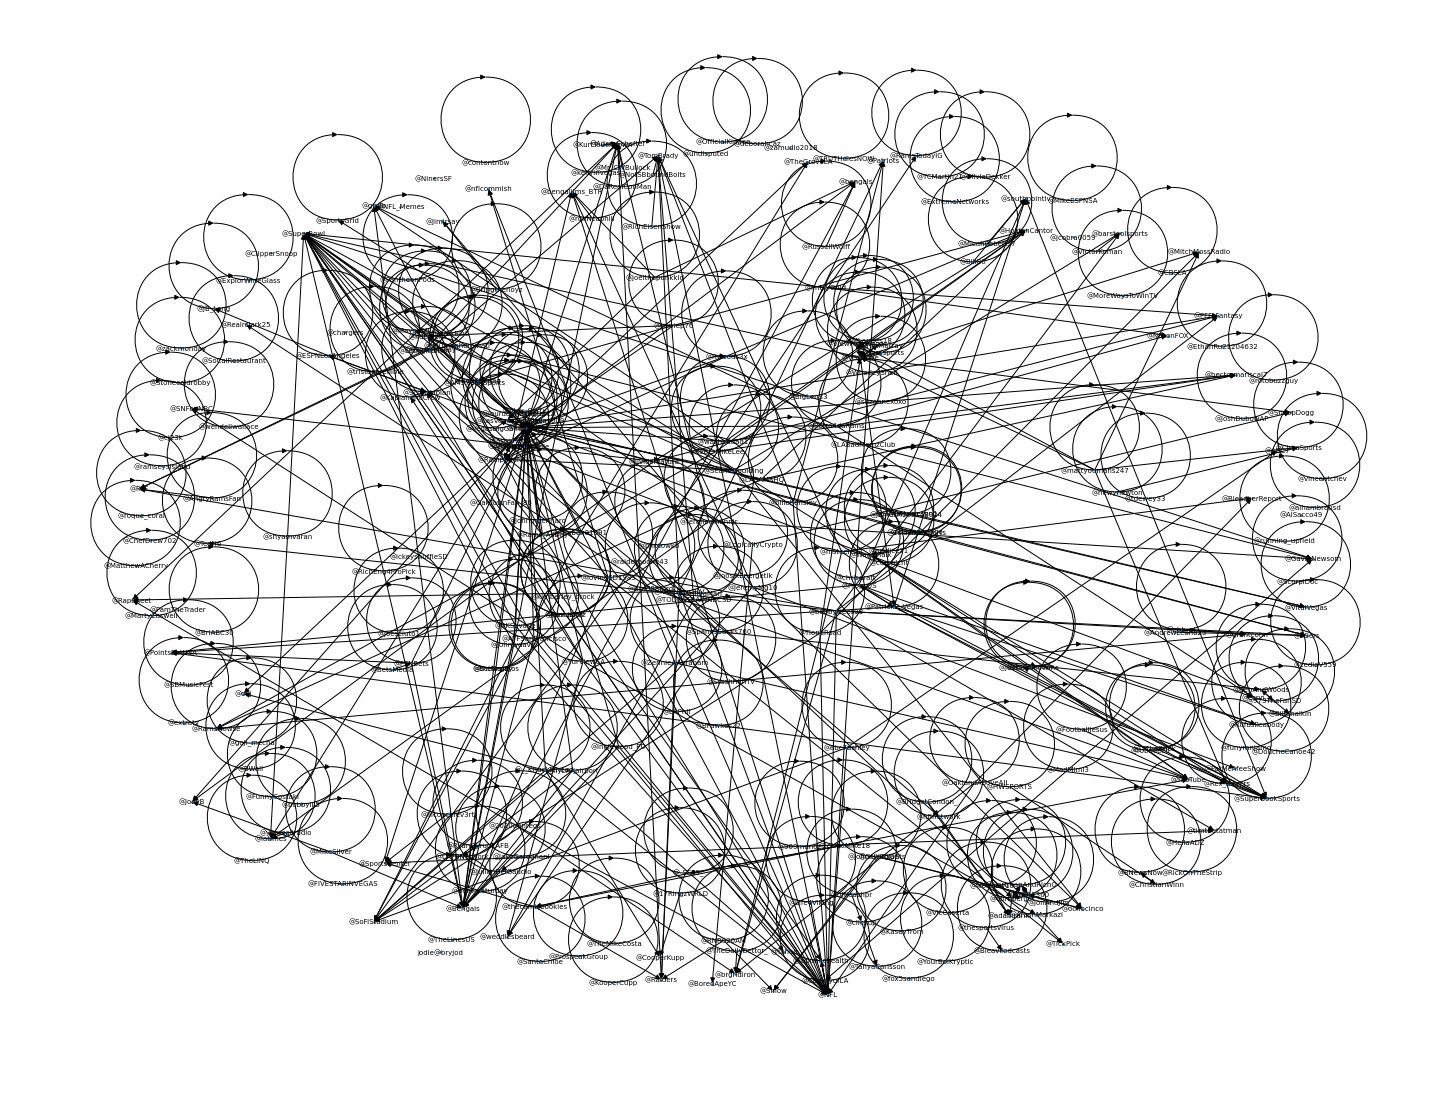

In [ ]:
plt.figure(figsize = (20, 15))

nx.draw(Graph, with_labels = True, node_size = 5, font_size = 7)  
plt.show()  